# **Problem Statement #1**

The prediction task is to determine whether
a person makes over 50K a year. Explain the
performance of the model using accuracy,
AUROC curve and confusion matrix. Feel
free to add any other metric you see fit.

In [492]:
import numpy as np
import pandas as pd

train_file = r"C:\Users\12489\Documents\Data\au_train.csv"
test_file = r"C:\Users\12489\Documents\Data\au_test.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

------------------

## first glance

In [493]:
train_df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool

In [494]:
test_df.isnull().any()

# this also ensures there are labels for the test data

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool

---------------

## slim it down!

###### i made the data a little less noisy... after testing, i think these are the most efficient variables

In [495]:
train_slim = train_df[['age', 'education-num', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']]
test_slim = test_df[['age', 'education-num', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']]


--------------------

## encoding 

In [496]:
train_slim = pd.get_dummies(train_slim, columns=['relationship', 'sex', 'class'])
train_slim.drop(['class_ >50K'], axis=1, inplace=True)

train_slim['label'] = train_slim['class_ <=50K']
train_slim.drop(['class_ <=50K'], axis=1, inplace=True)

In [497]:
test_slim = pd.get_dummies(test_slim, columns=['relationship', 'sex', 'class'])
test_slim.drop(['class_ >50K.'], axis=1, inplace=True)

test_slim['label'] = test_slim['class_ <=50K.']
test_slim.drop(['class_ <=50K.'], axis=1, inplace=True)

--------------------------

## split the data

In [498]:
X_train=train_slim.drop(columns=['label'],axis=1)
y_train=train_slim['label']

X_test=test_slim.drop(columns=['label'],axis=1)
y_test=test_slim['label']

X_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,39,13,2174,0,40,0,1,0,0,0,0,0,1
1,50,13,0,0,13,1,0,0,0,0,0,0,1
2,38,9,0,0,40,0,1,0,0,0,0,0,1
3,53,7,0,0,40,1,0,0,0,0,0,0,1
4,28,13,0,0,40,0,0,0,0,0,1,1,0


------------------

## confusion matrix

In [499]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [500]:
knn_classif = KNeighborsClassifier(n_neighbors=15)
knn_classif.fit(X_train, y_train)

y_pred = knn_classif.predict(X_test)

score = accuracy_score(y_test, y_pred)
score

0.8527117498925127

In [501]:
confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(2318, 1528, 870, 11565)

-----------------------

## AUROC

In [502]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

rf = RandomForestClassifier(max_features='auto', n_estimators=500)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

rf_score = accuracy_score(y_test, y_rf_pred)
rf_score

0.8452797739696579

In [503]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [504]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [505]:
from sklearn.metrics import roc_curve, roc_auc_score

In [506]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.891
Naive Bayes: AUROC = 0.873


In [507]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

In [508]:
import matplotlib.pyplot as plt

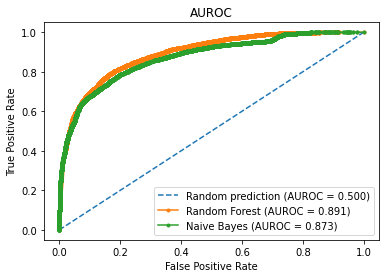

In [509]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('AUROC')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()